In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
data = {
    'Before': [80.50, 84.90, 81.50, 82.60, 79.90, 88.70, 94.90, 76.30, 81.00, 80.5, 85.00,
               89.20, 81.30, 76.50, 70.00, 80.40, 83.30, 83.00, 87.70, 84.2, 86.40, 76.50,
               80.20, 87.80, 83.30, 79.70, 84.50, 80.80, 87.40],
    'After': [82.20, 85.60, 81.40, 81.90, 76.40, 103.6, 98.40, 93.40, 73.40, 82.1, 96.70,
              95.30, 82.40, 72.50, 90.90, 71.30, 85.40, 81.60, 89.10, 83.9, 82.70, 75.70,
              82.60, 100.4, 85.20, 83.60, 84.60, 96.20, 86.70]
}

In [3]:
df = pd.DataFrame(data)
df['Difference'] = df['After'] - df['Before']
df.head()

,Before,After,Difference
0,80.5,82.2,1.7
1,84.9,85.6,0.7
2,81.5,81.4,-0.1
3,82.6,81.9,-0.7
4,79.9,76.4,-3.5


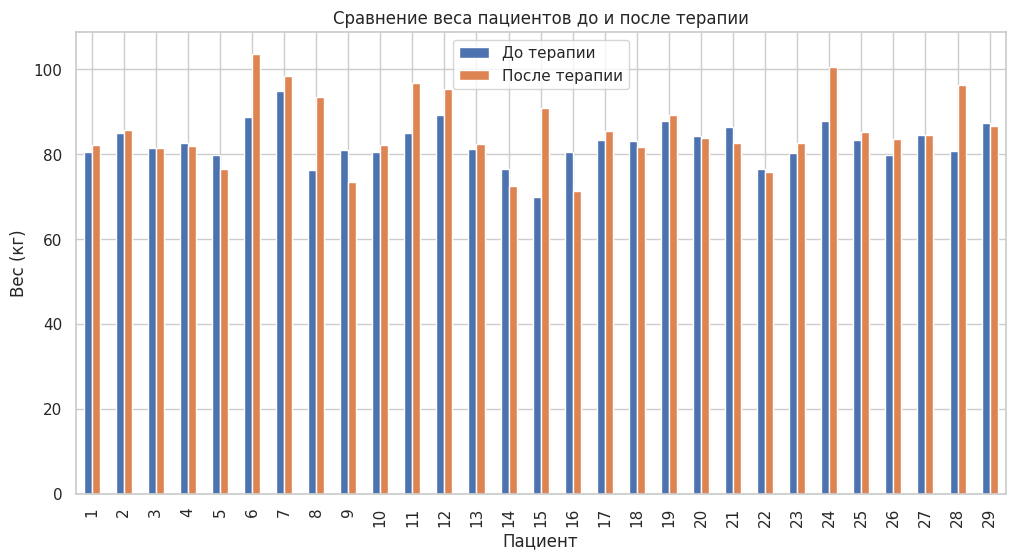

In [4]:
# Установка стиля графиков
sns.set(style='whitegrid')

# Построение графика
plt.figure(figsize=(12, 6))
df[['Before', 'After']].plot(kind='bar', ax=plt.gca())
plt.xlabel('Пациент')
plt.ylabel('Вес (кг)')
plt.title('Сравнение веса пациентов до и после терапии')
plt.xticks(ticks=range(len(df)), labels=range(1, len(df)+1))
plt.legend(['До терапии', 'После терапии'])
plt.show()


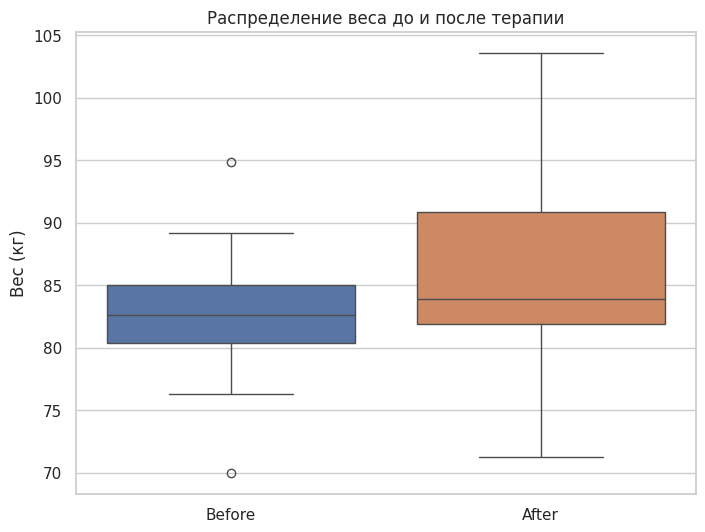

In [5]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Before', 'After']])
plt.title('Распределение веса до и после терапии')
plt.ylabel('Вес (кг)')
plt.show()


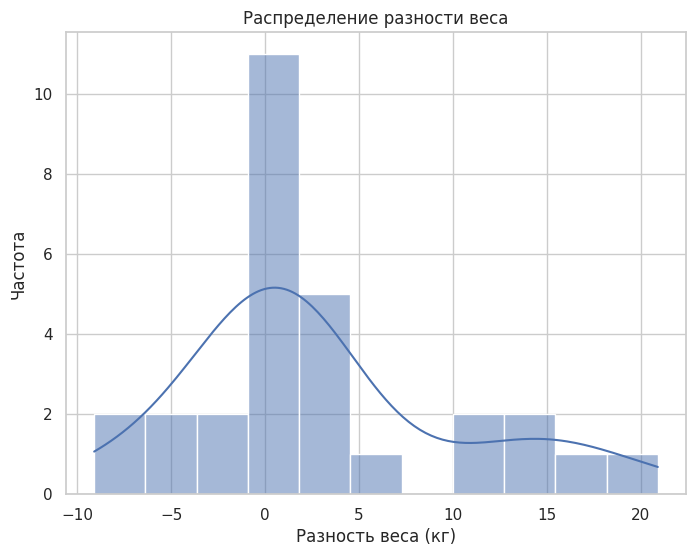

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Difference'], kde=True)
plt.title('Распределение разности веса')
plt.xlabel('Разность веса (кг)')
plt.ylabel('Частота')
plt.show()


In [7]:
mean_diff = df['Difference'].mean()
std_diff = df['Difference'].std(ddof=1)
n = len(df)

print(f'Средняя разность веса: {mean_diff:.2f} кг')
print(f'Стандартное отклонение разностей: {std_diff:.2f} кг')
print(f'Количество пациентов: {n}')


Средняя разность веса: 3.01 кг
Стандартное отклонение разностей: 7.31 кг
Количество пациентов: 29


In [8]:
t_stat, p_value = stats.ttest_rel(df['After'], df['Before'])

print(f'Т: {t_stat:.4f}')
print(f'P: {p_value:.4f}')


Т-статистика: 2.2156
P-значение: 0.0350


P меньше 0.05, нулевая гипотеза отвергается.
Это означает, что терапия оказала **статистически значимый** эффект на вес пациентов.

**ЗАКЛЮЧЕНИЕ**
Средняя разность веса после терапии составляет 3.01 кг, что указывает на тенденцию к увеличению веса.
Статистический анализ показал, что изменение веса является статистически значимым (p = 0.0348 < 0.05).
Визуализация данных подтверждает выводы статистического теста:
На столбчатой диаграмме видно что у большинства пациентов вес после терапии увеличился.
Коробчатые диаграммы показывают смещение медианы веса вверх после терапии.
Гистограмма разностей веса указывеат на преобладание положительных изменений веса.